# Căn chỉnh hình ảnh

## Căn chỉnh hình ảnh theo mẫu.
![văn bản thay thế](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_image-alignment-using-opencv.jpg "Căn chỉnh hình ảnh")

## Lý thuyết

1. Một **Homography** biến đổi một hình vuông thành một hình tứ giác bất kỳ.

![alt text](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_motion-models.jpg "Mô hình chuyển động")

2. Ảnh của hai mặt phẳng có liên quan với nhau bởi **Homography**
3. Chúng ta cần **4 điểm tương ứng** để ước tính Homography

!["Ví dụ về Homography"](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_homography-example.jpg)

In [11]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

## Bước 1: Đọc mẫu và hình ảnh được quét

In [12]:
# Đọc ảnh tham chiếu
refFilename = "image/form.jpg"
print("Reading reference image:", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Đọc ảnh để căn chỉnh
imFilename = "image/scanned-form.jpg"
print("Reading image to align:", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image: image/form.jpg
Reading image to align: image/scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

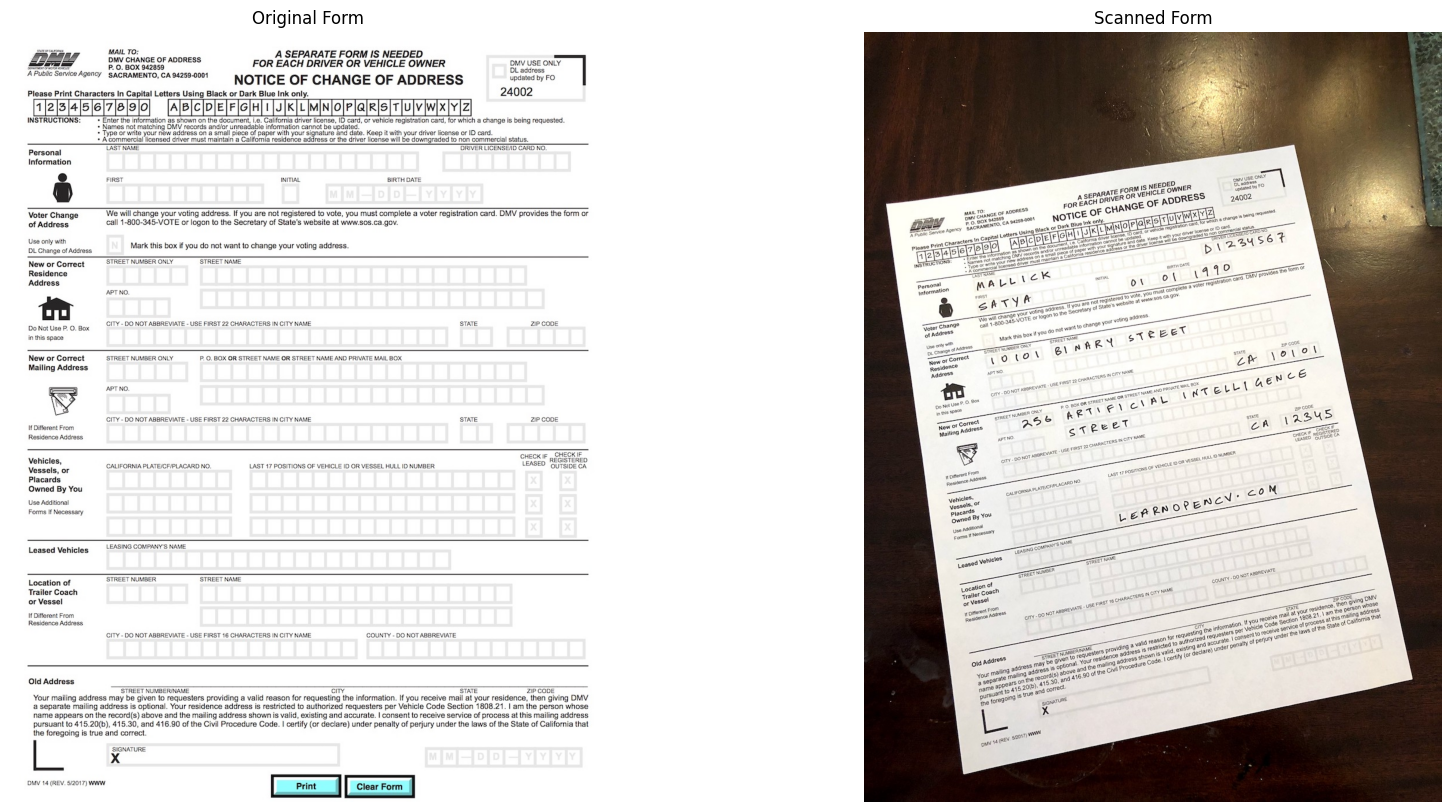

In [13]:
# Hiển thị hình ảnh

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

## Bước 2: Tìm điểm chính trong cả hai Hình ảnh

Hãy nghĩ về điểm chính như các điểm góc ổn định dưới các phép biến đổi hình ảnh

In [14]:
# Chuyển đổi hình ảnh sang thang độ xám
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Phát hiện các tính năng ORB và tính toán các mô tả.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Hiển thị
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]),
color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]),
color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

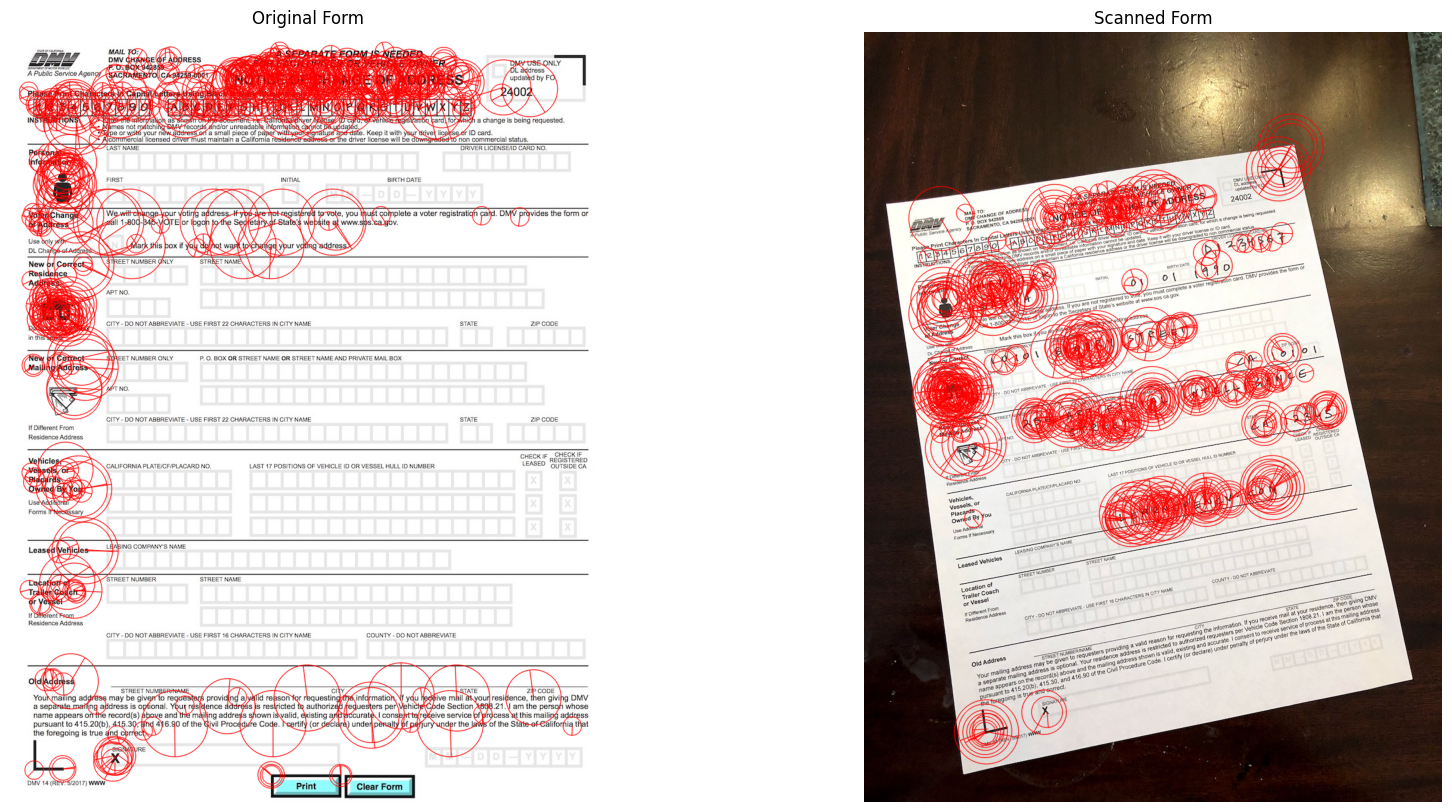

In [15]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

## Bước 3: Ghép các điểm chính trong hai hình ảnh

In [16]:
# Các tính năng khớp.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Chuyển đổi sang danh sách để sắp xếp vì các bộ là các đối tượng không thay đổi.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sắp xếp các kết quả khớp theo điểm
matches.sort(key=lambda x: x.distance, reverse=False)

# Xóa các kết quả khớp không tốt
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

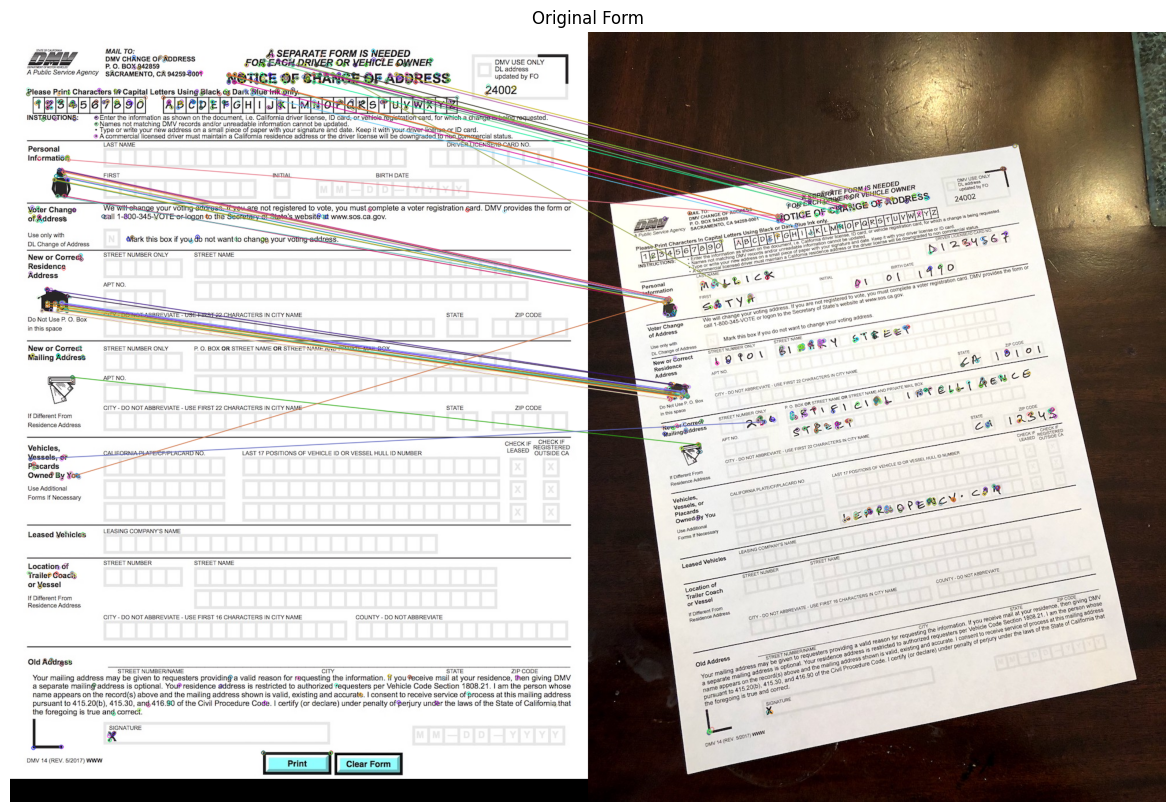

In [20]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

## Bước 4: Tìm Homography

In [18]:
# Trích xuất vị trí của các kết quả khớp tốt
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for  i,  match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Tìm phép đồng dạng
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

## Bước 5: Làm cong hình ảnh

Text(0.5, 1.0, 'Scanned Form')

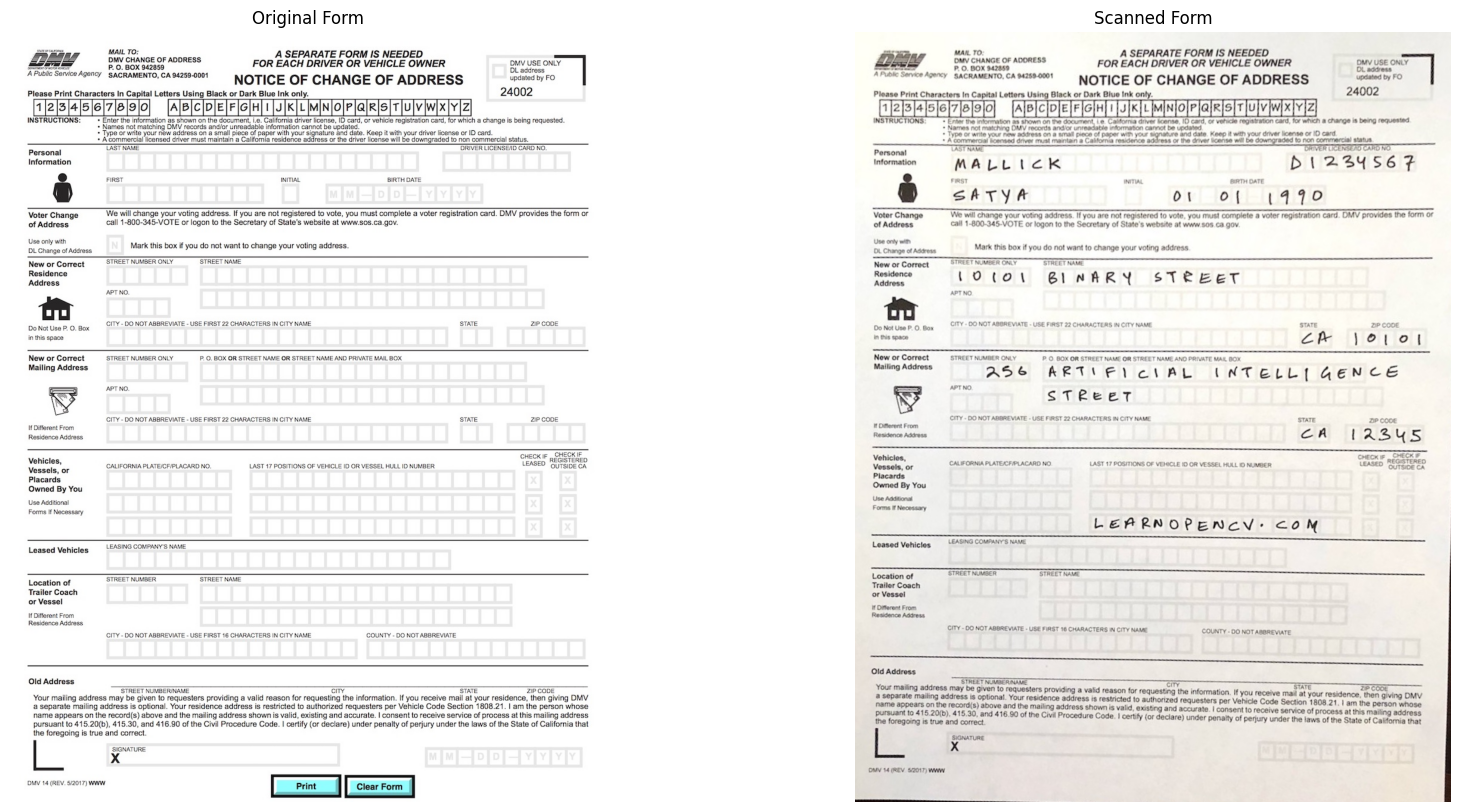

In [19]:
# Sử dụng phép đồng dạng để làm cong hình ảnh
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

# Mini Project

Định dạng lại ảnh Scan
- Sử dụng bộ nhận diện góc ở bài 7